<a href="https://colab.research.google.com/github/angel870326/NTU_Data_Mining/blob/main/hw2_multiclass_nb_eval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**NB Classification & Evaluation**
**NTU Data Mining HW2**

*Ssu-Yun Wang 2022.05.03*


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# sConnect to the Google Drive
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## **Mobile Price Classification Dataset from Kaggle**

https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification?select=train.csv


---



In [3]:
# Read dataset
dataset = pd.read_csv('/content/gdrive/Shareddrives/110-2 資料探勘第4組/HW2/train.csv')
dataset

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [4]:
# Predict price range
x = dataset.drop('price_range',axis=1)    
y = dataset['price_range']

## **Training & Testing**


---



In [5]:
# Split dataset into training & testing set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.80, test_size = 0.20, random_state = 42)

In [6]:
# Training
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

In [7]:
# Testing
y_pred  =  classifier.predict(x_test)
y_pred

array([0, 2, 0, 3, 1, 2, 2, 0, 3, 1, 0, 0, 2, 3, 2, 2, 3, 3, 1, 0, 0, 1,
       0, 2, 1, 1, 2, 2, 2, 0, 0, 0, 3, 0, 2, 1, 2, 0, 3, 0, 2, 3, 2, 0,
       3, 2, 2, 1, 3, 1, 3, 1, 0, 0, 1, 1, 1, 2, 0, 0, 1, 3, 3, 2, 1, 0,
       3, 3, 2, 2, 2, 3, 0, 1, 2, 0, 0, 3, 2, 2, 3, 2, 2, 0, 1, 3, 2, 3,
       3, 0, 3, 3, 2, 1, 3, 2, 2, 3, 2, 1, 0, 0, 1, 0, 0, 3, 2, 0, 1, 1,
       0, 0, 2, 1, 2, 2, 2, 3, 0, 2, 1, 3, 2, 1, 3, 2, 0, 3, 0, 2, 3, 0,
       2, 2, 0, 3, 1, 0, 1, 2, 3, 0, 2, 3, 0, 0, 1, 1, 2, 2, 3, 1, 1, 0,
       2, 2, 0, 1, 0, 2, 2, 3, 2, 2, 1, 0, 0, 2, 2, 3, 3, 1, 0, 0, 3, 1,
       2, 2, 1, 0, 0, 0, 0, 0, 3, 2, 0, 3, 0, 0, 0, 0, 1, 3, 3, 1, 0, 1,
       2, 1, 1, 2, 1, 2, 3, 3, 1, 3, 0, 0, 0, 1, 2, 1, 3, 1, 0, 3, 2, 1,
       3, 1, 2, 0, 0, 2, 1, 2, 0, 0, 2, 0, 1, 3, 2, 0, 1, 3, 3, 0, 2, 3,
       3, 3, 0, 2, 1, 2, 3, 3, 3, 1, 1, 3, 3, 1, 3, 3, 3, 3, 3, 0, 1, 2,
       2, 2, 2, 0, 2, 3, 2, 2, 2, 1, 0, 2, 0, 2, 3, 1, 3, 1, 0, 3, 1, 2,
       0, 0, 3, 0, 1, 2, 3, 3, 3, 0, 0, 0, 1, 3, 3,

In [8]:
# actual value
y_test.to_numpy()

array([0, 2, 1, 3, 1, 1, 2, 0, 3, 1, 0, 0, 2, 3, 3, 2, 3, 3, 1, 0, 0, 2,
       1, 2, 0, 1, 3, 2, 2, 0, 0, 0, 3, 0, 1, 1, 2, 0, 3, 0, 2, 3, 2, 0,
       2, 3, 2, 1, 3, 1, 3, 1, 0, 0, 1, 0, 1, 3, 0, 0, 1, 3, 3, 1, 0, 0,
       3, 3, 1, 2, 2, 2, 0, 1, 2, 0, 1, 3, 2, 2, 3, 2, 1, 0, 1, 3, 1, 3,
       3, 0, 3, 3, 2, 1, 3, 2, 2, 3, 1, 1, 0, 0, 1, 0, 0, 3, 2, 0, 1, 1,
       0, 0, 3, 1, 3, 2, 3, 2, 0, 2, 1, 3, 2, 1, 3, 3, 0, 2, 0, 2, 3, 0,
       2, 2, 0, 3, 1, 0, 0, 2, 2, 1, 3, 2, 0, 0, 0, 1, 1, 2, 3, 1, 1, 0,
       2, 2, 0, 1, 0, 2, 2, 3, 3, 2, 1, 0, 1, 2, 2, 3, 3, 0, 1, 0, 3, 1,
       1, 2, 1, 0, 0, 0, 0, 0, 3, 2, 0, 3, 0, 0, 0, 0, 1, 3, 3, 1, 0, 1,
       1, 1, 1, 2, 2, 3, 3, 3, 1, 2, 0, 0, 0, 2, 1, 1, 3, 1, 0, 2, 1, 1,
       3, 2, 3, 0, 0, 2, 1, 3, 0, 1, 2, 0, 2, 3, 2, 0, 1, 3, 3, 0, 1, 3,
       2, 3, 0, 3, 1, 2, 3, 3, 2, 1, 0, 3, 3, 1, 3, 3, 3, 3, 3, 0, 1, 2,
       2, 2, 3, 0, 2, 3, 2, 2, 2, 1, 0, 2, 0, 3, 3, 1, 3, 1, 0, 3, 1, 2,
       0, 0, 3, 0, 1, 2, 3, 3, 3, 1, 1, 0, 1, 3, 3,

## **Evaluation**


---



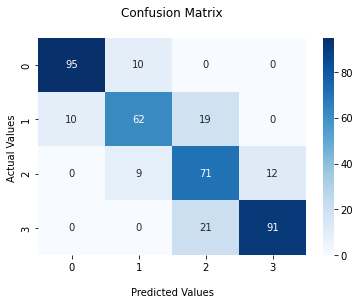

In [9]:
# Confusion matrix
from sklearn.metrics import confusion_matrix,recall_score,precision_score,accuracy_score,f1_score
cm = confusion_matrix(y_test, y_pred)

# Heatmap
import seaborn as sns
cm_plt = sns.heatmap(cm, annot=True, cmap='Blues')
cm_plt.set_title('Confusion Matrix\n');
cm_plt.set_xlabel('\nPredicted Values')
cm_plt.set_ylabel('Actual Values ');
cm_plt.xaxis.set_ticklabels(['0','1','2','3'])
cm_plt.yaxis.set_ticklabels(['0','1','2','3'])
plt.show()

In [10]:
# Scores
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, labels=[0,1,2,3]))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       105
           1       0.77      0.68      0.72        91
           2       0.64      0.77      0.70        92
           3       0.88      0.81      0.85       112

    accuracy                           0.80       400
   macro avg       0.80      0.79      0.79       400
weighted avg       0.81      0.80      0.80       400

